# Project: Tinanic Disaster

In [1]:
#import libraries
import numpy as np
import pandas as pd

## 1. Nhập dữ liệu

In [2]:
train_df = pd.read_csv('.\Data\\train.csv', index_col='PassengerId')
test_df = pd.read_csv('.\Data\\test.csv', index_col='PassengerId')

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [8]:
# Phân loại dữ liệu: numerical and categorical
# Numberical: age, fare
# Categorical: Pclass, Sex, SibSp, Parch, Embarked

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_cat(train_df, features)
convert_cat(test_df, features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [17]:
# Nhìn sự phân bố dữ liệu
train_df.describe() #Dữ liệu dạng numberical

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [12]:
train_df.describe(include = ['category']) #Dữ liệu dạng categorical

,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,889
unique,3,2,7,7,3
top,3,male,0,0,S
freq,491,577,608,678,644


## 2.Khai phá dữ liệu theo target: survived

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


### 1. Categorical Data

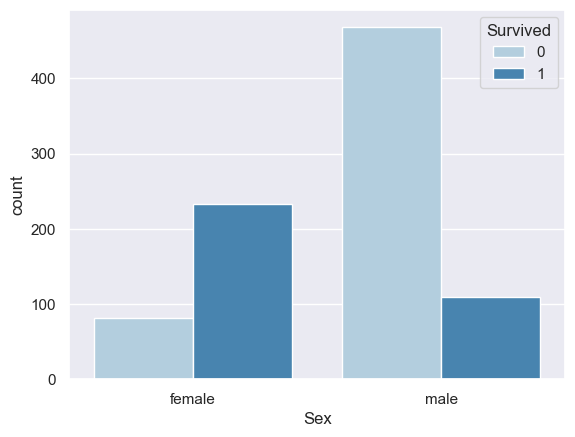

In [25]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette='Blues');

Tỷ lệ phụ nữ sống cao hơn đàn ông

### Trực quan hóa sự tương quan dữ liệu với Survived

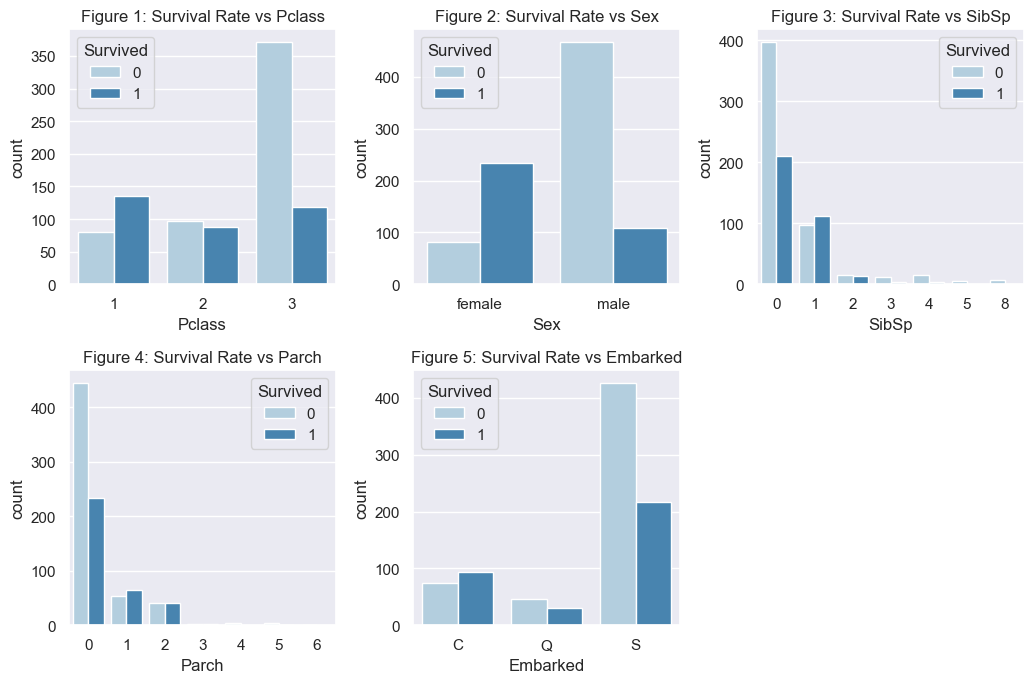

In [48]:
n_rows, n_cols = 2, 3
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c
        ax_i = ax[r, c]
        if i < len(cols):
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show();


## 2. Numberical Data

In [34]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


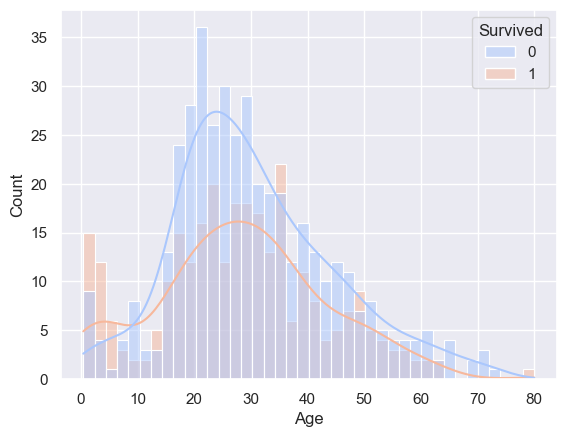

In [40]:
sns.histplot(data = train_df, x = 'Age', bins = 40, hue = 'Survived', palette='coolwarm', kde = True);

Từ 0 đến 6,7 tuổi và từ 80 tuổi trở lên sẽ có tỉ lệ sống cao

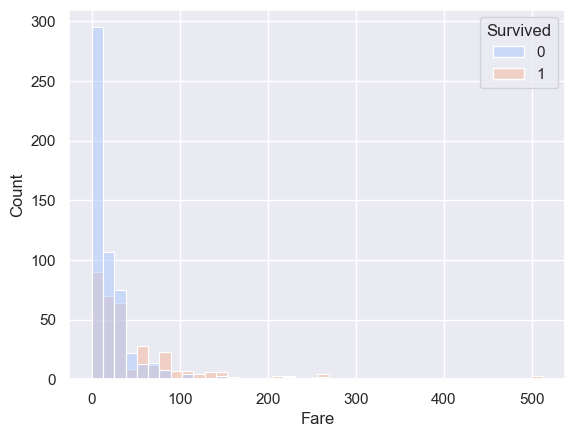

In [41]:
sns.histplot(data = train_df, x = 'Fare', bins = 40, hue = 'Survived', palette='coolwarm');

* 1 Cách để chia dữ liệu ra thành quartile

In [44]:
labels = ['Normal', 'Standard', 'Expensive', 'Luxury']
Fare_cat = pd.qcut(train_df['Fare'], 4, labels=labels)
Fare_cat

PassengerId
1         Normal
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891       Normal
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Normal' < 'Standard' < 'Expensive' < 'Luxury']

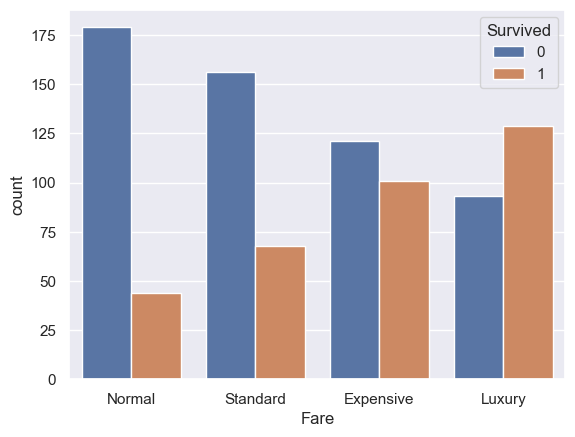

In [47]:
sns.countplot(x = Fare_cat, hue = train_df['Survived']);

Người càng giàu càng sống lâu

## 3. Feature Engineering